# 【課題1】データセットの取得

In [67]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import scipy
from quilt.data.ResidentMario import missingno_data
collisions = missingno_data.nyc_collision_factors()
collisions = collisions.replace("nan", np.nan)
%matplotlib inline

In [68]:
df = pd.read_csv('train.csv')

# 【課題2】データセット自体の調査

目的変数を確認
'SalePrice'とし最終価格を出すためのデータセット
OVERVIEWにある様に  
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.  
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.  
住宅価格でアイオワ州エイムスの住宅の（ほぼ）あらゆる側面を説明する79の説明変数があるこのコンペ。  
予測値の対数と観察された販売価格の対数の間の二乗平均平方根誤差（RMSE）で評価される。

In [69]:
len(df.columns)
#81のカラムがある一つは従属変数、一つはidなので説明変数は７９個

81

In [70]:
#NaNが大量にあるので前処理をしなくてはならない。またカラム毎のレンジがバラバラなので正規化も必要かもしれない
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# 【課題3】データの確認

In [71]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


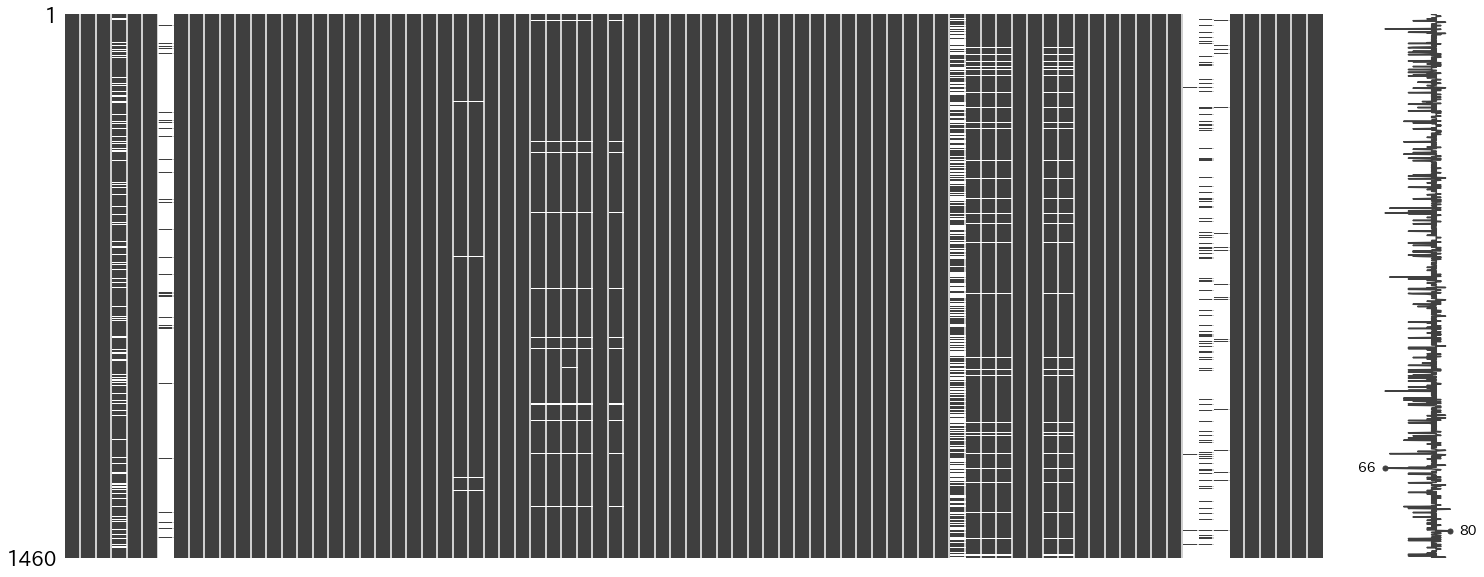

In [72]:
msno.matrix(df)

・各特徴量がどういったものかを見る  
数値の変数とカテゴリの変数がある。数値は単位が揃っていないので正規化をする必要がありカテゴリは定性変数なのでone-hotエンコーディングをする必要があるかも  
・今回の目的変数はどの列か確認する。  
  OVERVIEWにも書いてある通りSalePriceが目的変数

In [73]:
df.info()
#7カラム目のAllayがnullを大量に含んでいるのがわかる,FireplaceQu,PoolQC ,Fence,MiscFeatureも大量に欠損値を含む。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 【課題4】欠損値への対応

In [74]:
 df1 = pd.DataFrame({
                        'total' : len(df),
                        'missing_ratio' : df.isnull().sum()/len(df)
                        })

In [75]:
#まず欠損値の割合を出す
df1.sort_values('missing_ratio',ascending=False)

,total,missing_ratio
PoolQC,1460,0.995205
MiscFeature,1460,0.963014
Alley,1460,0.937671
Fence,1460,0.807534
FireplaceQu,1460,0.472603
LotFrontage,1460,0.177397
GarageYrBlt,1460,0.055479
GarageCond,1460,0.055479
GarageType,1460,0.055479
GarageFinish,1460,0.055479


In [76]:
#欠損値がカラムに五つ以上ある列は削除する
#欠損値がある行は削除する
dell_alow= len(df) - 5

df.dropna(axis=1,inplace=True,thresh=dell_alow)
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-

In [77]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


# 【課題5】用語の調査

- 尖度
データのヒストグラムが上に尖っている割合、尖度が高い方が上に突出した形になっている。正規分布より尖った分布データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値

$${\frac{n(n + 1)}{(n - 1)(n - 2)(n - 3)}\sum_{i=1}^{n} \frac{(x_i - \bar{x})^4}{s^4}} - \frac{3(n - 1)^2}{(n - 2)(n - 3)}$$

- 歪度　データのヒストグラムが湾曲している度合い。右に偏っていればーの値、左に偏っていれば＋の値。左右対称なら０

 $${\frac{n}{(n - 1)(n - 2)}\sum_{i=1}^{n} \Bigl(\frac{x_i - \bar{x}}{s}\Bigr)^3}$$

# 【課題6】分布の確認

In [78]:
sp_v= df['SalePrice']

/anaconda3/envs/DIC/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


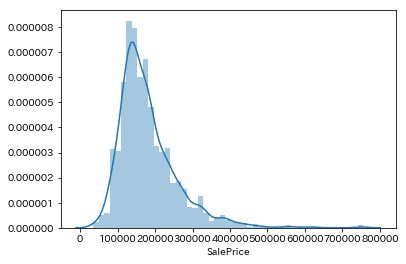

In [79]:
sns.distplot(sp_v)

In [80]:
#歪度正の値なので左に偏っている。
scipy.stats.skew(sp_v)

1.880007613681095

歪度が１を超えているので正規分布に比べると左に中央値があるのが分かる

In [81]:
#尖度　正規分布の尖度は３なので６.５はかなり突出している。
scipy.stats.kurtosis(sp_v)

6.502799105301849

尖度鮮度が高いので中央値に集中して値が発生しているのが分かる

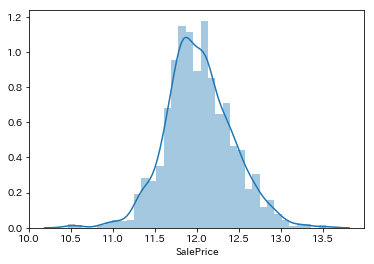

In [82]:
#目的関数に対数変換をしている
sns.distplot(sp_v.apply(np.log))

In [83]:
#目的関数に対数変換をしている
scipy.stats.kurtosis(sp_v.apply(np.log))

0.8000555650770789

In [84]:
#目的関数に対数変換をしている
scipy.stats.skew(sp_v.apply(np.log))
#歪度が０に近いので正規分布の分布に近いのが分かる

0.12119299622459463

# 【課題7】相関係数の確認

In [85]:
#dfの相関係数、数字出ないカラムは自動的に削除して計算されるSalePriceのカラムでソートしている
df_corr = df.corr()
df_s = df_corr.sort_values('SalePrice', ascending=False)
print(df_s)

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
SalePrice     -0.021756   -0.084230  0.263837     0.791069    -0.077924   
OverallQual   -0.027553    0.032936  0.105786     1.000000    -0.092243   
GrLivArea      0.008524    0.074949  0.263109     0.593021    -0.079777   
GarageCars     0.016254   -0.040232  0.154893     0.600991    -0.185670   
GarageArea     0.018010   -0.098558  0.180392     0.561980    -0.151662   
TotalBsmtSF   -0.013815   -0.238160  0.260962     0.537523    -0.171796   
1stFlrSF       0.011627   -0.251484  0.299533     0.475933    -0.144646   
FullBath       0.004758    0.131354  0.126100     0.551267    -0.193929   
TotRmsAbvGrd   0.026948    0.040274  0.190037     0.427720    -0.057485   
YearBuilt     -0.013945    0.027435  0.014296     0.573334    -0.375780   
YearRemodAdd  -0.023158    0.040199  0.013852     0.551605     0.074158   
Fireplaces    -0.018788   -0.045232  0.271398     0.396455    -0.024167   
BsmtFinSF1    -0.004001  

(35, 35)


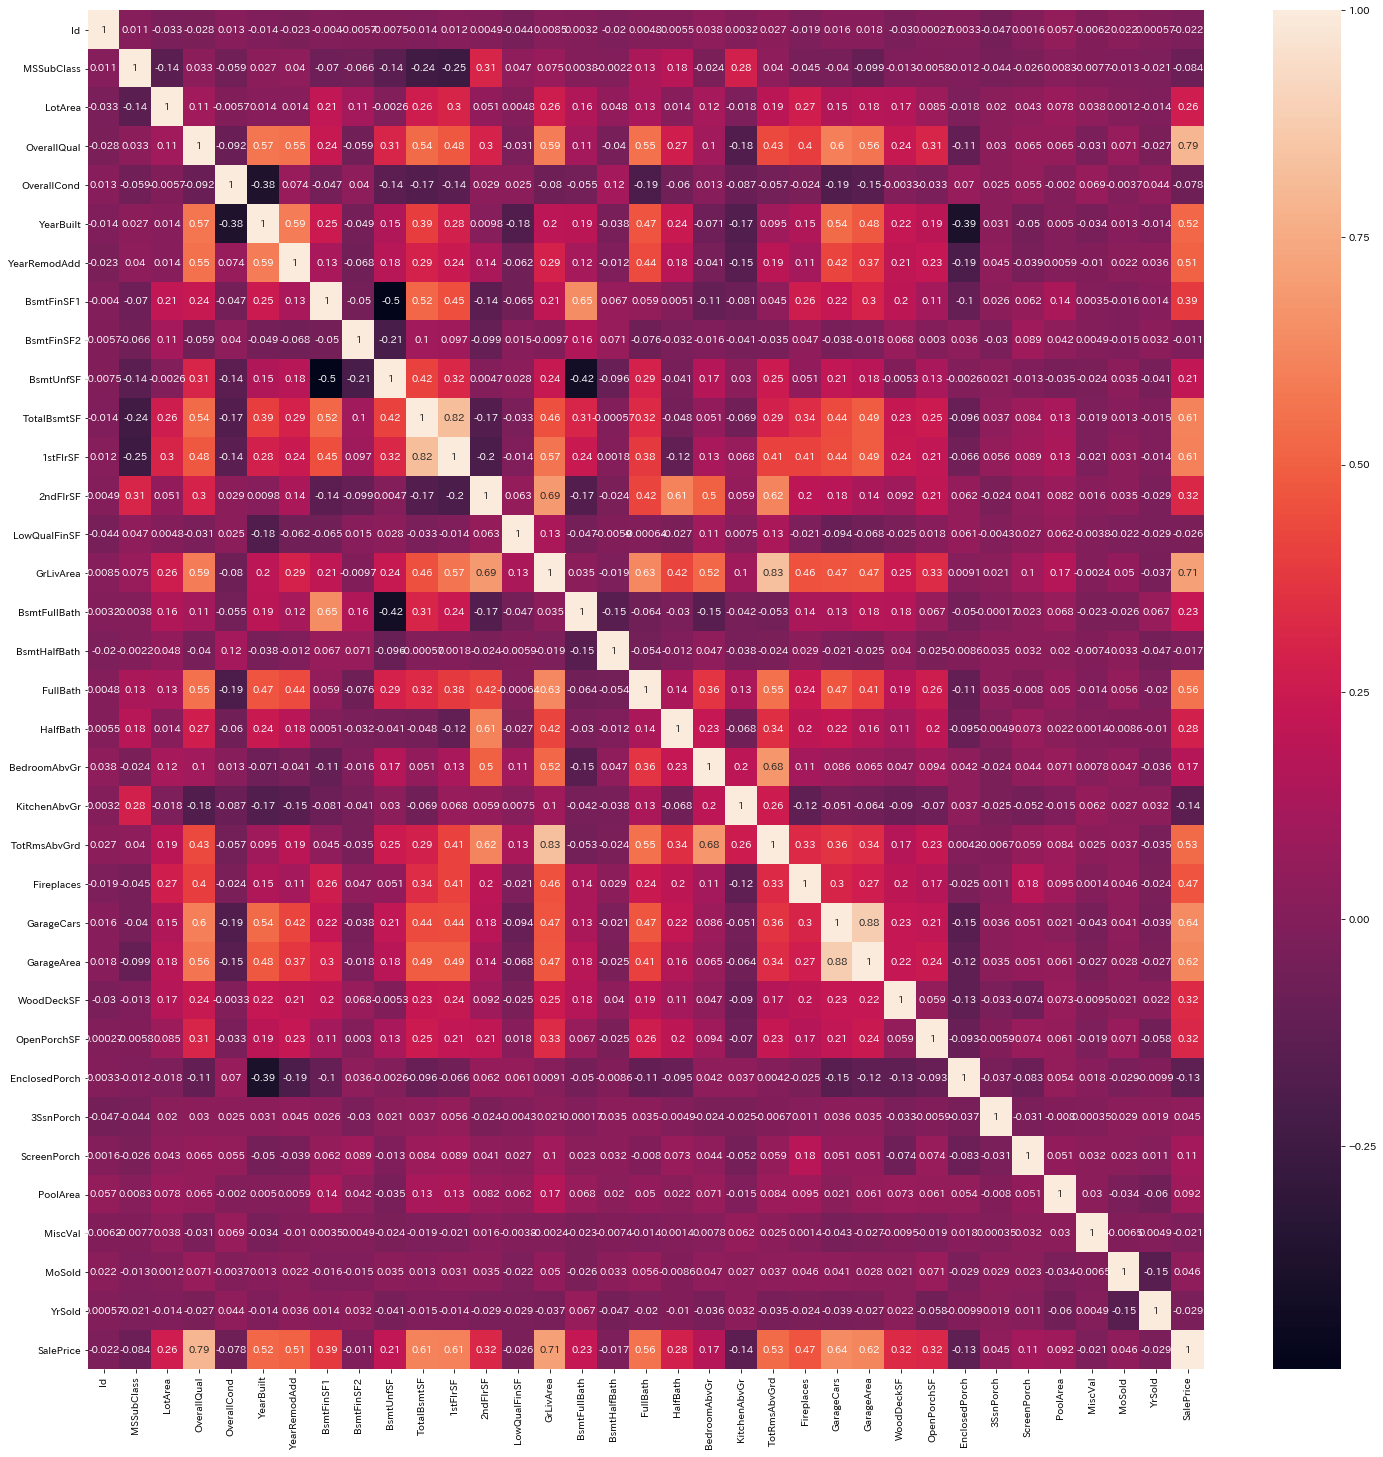

In [86]:
#特徴量３5個のヒートマップ
plt.figure(figsize=(25, 25)) 
print(df_corr.shape)
sns.heatmap(df_corr, annot=True)

In [87]:
df_s['SalePrice'][np.abs(df_s['SalePrice'])>0.3][1:11]
#SalePriceと特徴量の相関関係が絶対値０.３以上のもの１０件

OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Name: SalePrice, dtype: float64

In [88]:
#特徴量の絶対値が０.3以上のSalePrice塗装完治が高いもの上位１０個の名前を取得
select_top_10 = df_s['SalePrice'][np.abs(df_s['SalePrice'])>0.3][:11].index

In [89]:
df_top_10 = df[select_top_10].corr()

In [90]:
#特徴量上位１０個の相関係数のデータフレーム
df_top_10

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.791069,0.708618,0.640473,0.623423,0.613905,0.605968,0.560881,0.533779,0.523273,0.507430
OverallQual,0.791069,1.000000,0.593021,0.600991,0.561980,0.537523,0.475933,0.551267,0.427720,0.573334,0.551605
GrLivArea,0.708618,0.593021,1.000000,0.467321,0.468971,0.455001,0.566084,0.630283,0.825576,0.199286,0.287677
GarageCars,0.640473,0.600991,0.467321,1.000000,0.882613,0.435279,0.439726,0.469619,0.362248,0.537866,0.420573
GarageArea,0.623423,0.561980,0.468971,0.882613,1.000000,0.486719,0.489741,0.405944,0.337915,0.479460,0.372012
TotalBsmtSF,0.613905,0.537523,0.455001,0.435279,0.486719,1.000000,0.819393,0.324886,0.286125,0.393159,0.292546
1stFlrSF,0.605968,0.475933,0.566084,0.439726,0.489741,0.819393,1.000000,0.381438,0.409901,0.283056,0.241344
FullBath,0.560881,0.551267,0.630283,0.469619,0.405944,0.324886,0.381438,1.000000,0.554759,0.467960,0.438733
TotRmsAbvGrd,0.533779,0.427720,0.825576,0.362248,0.337915,0.286125,0.409901,0.554759,1.000000,0.095401,0.191603
YearBuilt,0.523273,0.573334,0.199286,0.537866,0.479460,0.393159,0.283056,0.467960,0.095401,1.000000,0.592512


OverallQual：素材と完成度  
GrLivArea：地上の広さ  
GarageCars：ガレージに何台車が入るか  
GarageArea：ガレージの広さ  
TotalBsmtSF：地下の広さ  
1stFlrSF：１階の広さ  
FullBath：1階以上にシャワールームではなく浴室があるか？  
TotRmsAbvGrd：一回以上の部屋の数ただしバスルームは除く  
YearBuilt：建築された年  
YearRemodAdd：改修工事をした年  

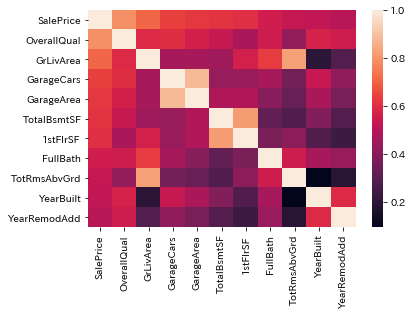

In [91]:
sns.heatmap(df_top_10)

In [92]:
print(list(select_top_10))

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [93]:
import itertools
list(itertools.combinations(select_top_10,2))

[('SalePrice', 'OverallQual'),
 ('SalePrice', 'GrLivArea'),
 ('SalePrice', 'GarageCars'),
 ('SalePrice', 'GarageArea'),
 ('SalePrice', 'TotalBsmtSF'),
 ('SalePrice', '1stFlrSF'),
 ('SalePrice', 'FullBath'),
 ('SalePrice', 'TotRmsAbvGrd'),
 ('SalePrice', 'YearBuilt'),
 ('SalePrice', 'YearRemodAdd'),
 ('OverallQual', 'GrLivArea'),
 ('OverallQual', 'GarageCars'),
 ('OverallQual', 'GarageArea'),
 ('OverallQual', 'TotalBsmtSF'),
 ('OverallQual', '1stFlrSF'),
 ('OverallQual', 'FullBath'),
 ('OverallQual', 'TotRmsAbvGrd'),
 ('OverallQual', 'YearBuilt'),
 ('OverallQual', 'YearRemodAdd'),
 ('GrLivArea', 'GarageCars'),
 ('GrLivArea', 'GarageArea'),
 ('GrLivArea', 'TotalBsmtSF'),
 ('GrLivArea', '1stFlrSF'),
 ('GrLivArea', 'FullBath'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'YearBuilt'),
 ('GrLivArea', 'YearRemodAdd'),
 ('GarageCars', 'GarageArea'),
 ('GarageCars', 'TotalBsmtSF'),
 ('GarageCars', '1stFlrSF'),
 ('GarageCars', 'FullBath'),
 ('GarageCars', 'TotRmsAbvGrd'),
 ('GarageCars', 'Ye

In [94]:
indices = [(x,y,df_top_10[x][y]) for x, y in list(itertools.combinations(select_top_10,2))]

In [95]:
df2 = pd.DataFrame(indices, columns=["f1","f2","f_val"])

In [96]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
df2[10:].sort_values('f_val', ascending=False)[:3]

,f1,f2,f_val
27,GarageCars,GarageArea,0.882613
24,GrLivArea,TotRmsAbvGrd,0.825576
40,TotalBsmtSF,1stFlrSF,0.819393


In [97]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=42)

In [98]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  35
Number of Categorical features:  28


In [99]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual

In [100]:
#one_hotエンコーディングをしている
df = pd.get_dummies(df)
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


# （オプション）【課題8】重要度の算出

/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


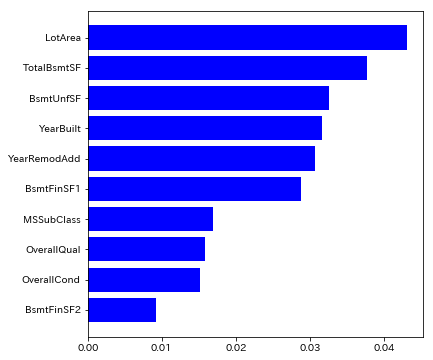

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
train_X = df.drop(["SalePrice","Id"], axis=1)
train_y = df["SalePrice"]
clf = clf.fit(train_X, train_y)
features = train_X.columns
importances = clf.feature_importances_[:10]
indices = np.argsort(importances)[:10]

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()
#重要度を大きい方から１０個